Customer churn/customer retention/customer turnover/customer defection merupakan kejadian dimana perusahaan kehilangan klien atau konsumen. Banyak perusahaan menggunakan customer churn sebagai key business metrics karena menambah customer baru diperlukan biaya lebih banyak dibandingkan mempertahankan customer lama. Perusahaan yang menggunakan indikator ini yakni Perusahaan Telecom. Perusahaan Telecom ingin mengetahui kebiasaan perilaku customer churn (customer yang pergi dalam sebulan terakhir) berdasarkan berbagai aspek. Tujuan dari project ini adalah memprediksi customer churn untuk mempertahankan customer Perusahaan Telecom. Dataset ini memberikan analisis untuk memahami karakteristik yang menyebabkan customer churn, pengembangan model untuk memprediksi apakah customer kemungkinan besar akan meninggalkan bisnis, dan evaluasi beberapa strategi untuk mencegah customer churn.

## Import Library

In [1]:
#import library
import numpy as np #linear algebra
import pandas as pd #data processing
import seaborn as sns

## Load Datasets

In [2]:
data=pd.read_csv("https://challenge2.s3.jp-tok.cloud-object-storage.appdomain.cloud/telco.csv",sep=";")

## Data Understanding

In [3]:
#See the first 5 data
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [4]:
#See the number of rows and number of columns of data
data.shape

(7043, 21)

In [5]:
#Understanding each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
#See a statistical summary of variables with numeric types
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.401107,64.751874
std,0.368612,24.606849,30.097858
min,0.000000,1.000000,12.000000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,120.000000,118.750000


The dataset includes information about:
+ Customers who churned — the column is called Churn
+ Services that each customer has signed up for — phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ Customer account information — how long they’ve been a customer, the type of contract (month-to-month, one-year, two-years), payment method, paperless billing, monthly charges, and total charges
+ Demographic info about customers — gender, age, and if they have partners and dependents

## Data Cleaning and Preprocessing

### Check Duplicate Data

In [7]:
#Drop duplicate value
data.drop_duplicates(inplace=True)

In [8]:
#See changes in the number of rows and columns after the duplicate value is deleted
data.shape

(7043, 21)

### Check Data Types

In [9]:
#Check Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [11]:
#merubah nilai kosong dengan isi spasi menjadi NA
data["totalcharges"]=data["totalcharges"].replace(" ",np.nan)

In [12]:
#merubah tipe data
data["totalcharges"]=data["totalcharges"].astype("float64")

In [13]:
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

### Check Missing Value

In [14]:
#Check the missing value
data.isnull().sum()

customerid           0
region               0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

### Impute Missing value

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


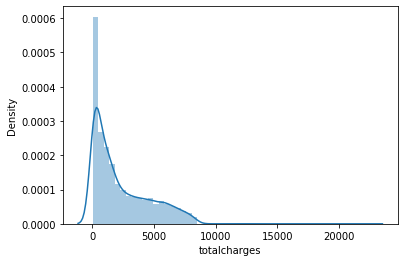

In [15]:
#Look at the distribution of the totalcharges variable with histogram and density plot
sns.distplot(data["totalcharges"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


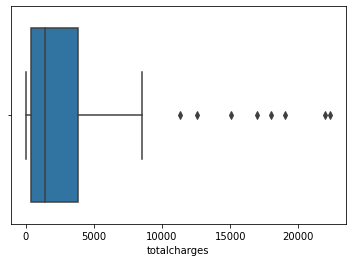

In [16]:
#Look at the distribution of the totalcharges variable with boxplot
sns.boxplot(data["totalcharges"])

In [17]:
#Because the totalcharges variable has positive skewed, therefore the missing value is imputed with the median
fill=data["totalcharges"].median()
data["totalcharges"]=data["totalcharges"].fillna(fill)

In [18]:
#Check missing value after imputation
data.isnull().sum()

customerid          0
region              0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### Outlier Detection

In [19]:
#Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("Number of Outlier {}".format(number_outlier))
    if number_outlier>0:
        print("Outlier observation row:")
    else:
        pass
    for i in range(len(sample)):
        if sample[i]<lower_range: 
            print(i)
        elif sample[i]>upper_range:
            print(i)
        else:
            pass

In [20]:
#Check Outlier on the Tenure variable
outlier(data["tenure"])

Number of Outlier 0


In [21]:
#Check Outlier on the monthlycharges variable
outlier(data["monthlycharges"])

Number of Outlier 0


In [22]:
#Check Outlier on the totalcharges variable
outlier(data["totalcharges"])

Number of Outlier 8
Outlier observation row:
7024
7025
7026
7027
7028
7029
7030
7031


In [23]:
#See observation outliers on the totalcharges variable
Q1=data["totalcharges"].quantile(0.25)
Q3=data["totalcharges"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["totalcharges"]>upper_range),:]

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7024,2889-FPWRM,Germany,Male,0,Yes,No,96,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),117.80,11308.8,Yes
7025,7892-POOKP,France,Female,0,Yes,No,120,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,12576.0,Yes
7026,7569-NMZYQ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),118.75,15087.9,No
7027,9739-JLPQJ,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,Credit card (automatic),117.50,16987.9,No
7028,9924-JPRMC,Germany,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,118.20,17987.3,No
7029,8879-XUAHX,Germany,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Electronic check,116.25,18987.9,No
7030,9788-HNGUT,Germany,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),116.95,21987.5,No
7031,6007-TCTST,Germany,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Bank transfer (automatic),115.80,22345.6,No


In [24]:
#Replace outlier observations with upper bound and lower bound
data.loc[(data["totalcharges"]>upper_range),"totalcharges"]=upper_range
data.loc[(data["totalcharges"]<lower_range),"totalcharges"]=lower_range

In [25]:
#Check outlier after replace with upper and lower bound 
outlier(data["totalcharges"])

Number of Outlier 0


### Handle Inconsistent Data

In [26]:
#Replace "No Internet Service" with "No"
replace_cols1 = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols1 :
    data[i]  =data[i].str.strip()
    data[i]  = data[i].replace({'No internet service' : 'No'})

#Replace "No Phone Service" with "No"
replace_cols2 = ['multiplelines']
for i in replace_cols2 :
    data[i]  =data[i].str.strip()
    data[i]  = data[i].replace({'No phone service' : 'No'})

# Exploratory Data Analysis (EDA)

### import module

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")

Text(0.5, 1.0, 'Region')

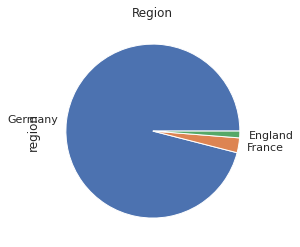

In [28]:
data.region.value_counts().plot(kind='pie')
plt.title('Region')

##Target variable

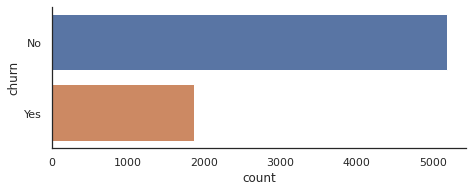

In [29]:
ax = sns.catplot(y="churn", kind="count", data=data, height=2.6, aspect=2.5, orient='h')

##Variabel numeric

In [30]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')


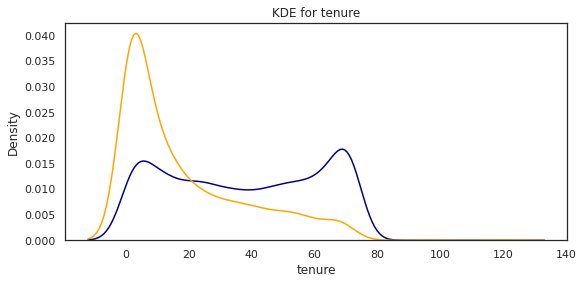

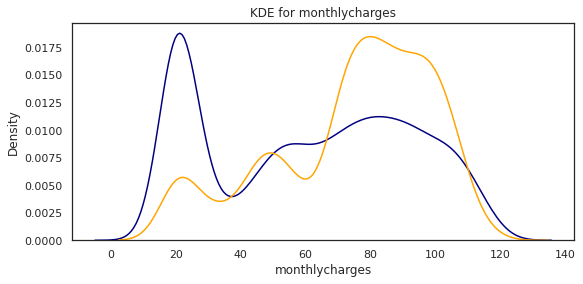

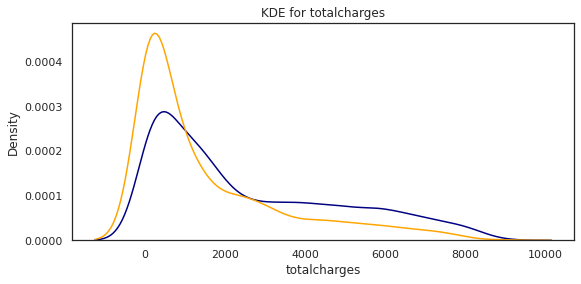

In [31]:
kdeplot('tenure')
kdeplot('monthlycharges')
kdeplot('totalcharges')

##categorical feature
dataset ini memiliki 16 fitur kategorik

6 fitur biner (Yes/No)

9 fitur dengan 3 nilai unik per fitur (categories)

1 fitur dengan 4 nilai yang unik

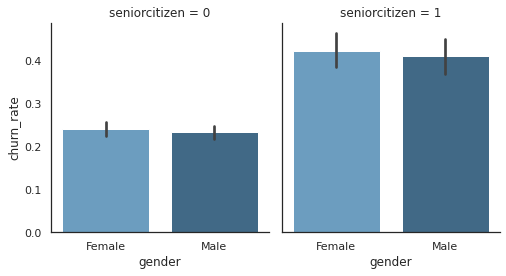

In [32]:
data['churn_rate'] = data['churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="seniorcitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

####partners

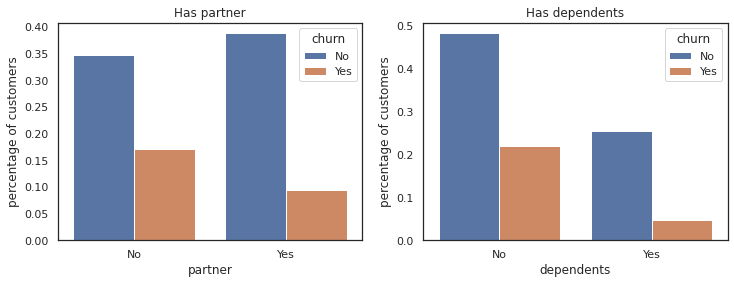

In [33]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = data.groupby('partner')["churn"].value_counts()/len(data)
gp_partner = gp_partner.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='partner', y= axis_y, hue='churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = data.groupby('dependents')["churn"].value_counts()/len(data)
gp_dep = gp_dep.to_frame().rename({"churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='dependents', y= axis_y, hue='churn', data=gp_dep, ax=axis[1])

####multiple lines

Text(0.5, 1.0, 'Pengaruh Multiplelines terhadap monthly charges')

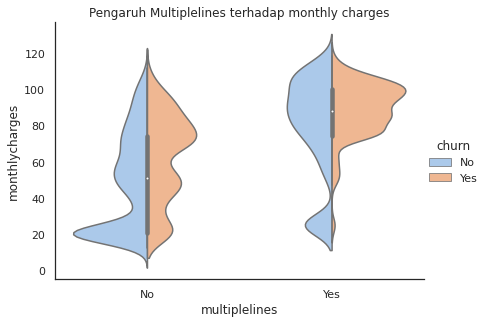

In [34]:
ax = sns.catplot(x="multiplelines", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4)
plt.title('Pengaruh Multiplelines terhadap monthly charges')

####internet services and monthly charges

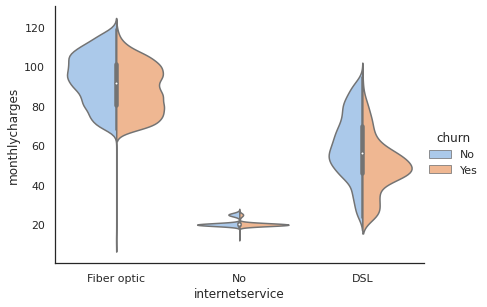

In [35]:
ax = sns.catplot(x="internetservice", y="monthlycharges", hue="churn", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4);

####additional services

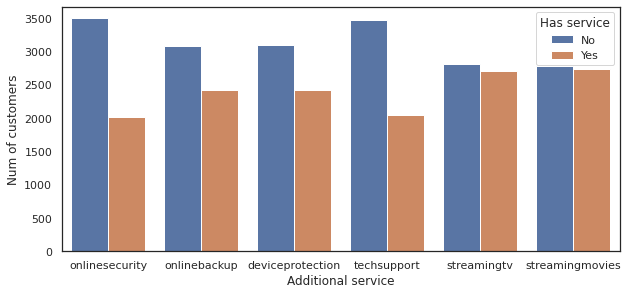

In [36]:
cols = ["onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies"]
dt1 = pd.melt(data[data["internetservice"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=dt1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

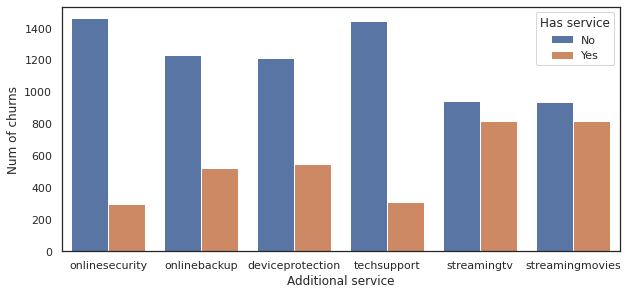

In [37]:
plt.figure(figsize=(10, 4.5))
dt1 = data[(data.internetservice != "No") & (data.churn == "Yes")]
dt1 = pd.melt(dt1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=dt1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

####payment

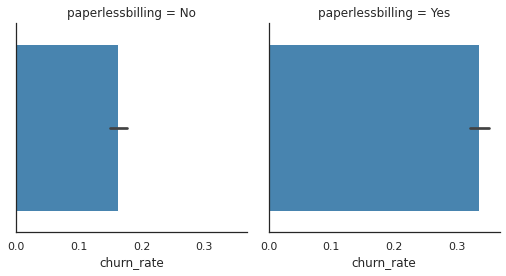

In [38]:
g = sns.FacetGrid(data, col="paperlessbilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

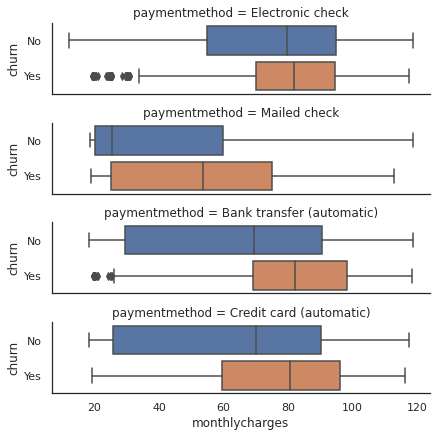

In [39]:
ax = sns.catplot(y="churn", x="monthlycharges", row="paymentmethod", kind="box", data=data, height=1.5, aspect=4, orient='h')

# Feature Enginering

### Binning or Discretization Variable

In [40]:
#Binning tenure variables become categorical variables
from sklearn.preprocessing import KBinsDiscretizer

scaler=KBinsDiscretizer(n_bins=[5],encode="ordinal",strategy='quantile')
data[["tenure"]]=scaler.fit_transform(data[["tenure"]])

In [41]:
#Check Tenure Data Type
data.dtypes

customerid           object
region               object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
churn_rate            int64
dtype: object

### Encoding Variables

In [42]:
from sklearn.preprocessing import LabelEncoder

#Separating categorical and numerical columns
Id_col     = ['customerid']
target_col = ["churn"]
cat_cols   = data.nunique()[data.nunique() < 5].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#multinomial columns
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Label encoding for nominal multi value columns
data2=pd.get_dummies(data = data,columns = multi_cols,drop_first=False)
data3=pd.get_dummies(data = data,columns = multi_cols,drop_first=True)

### Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaling_col=['monthlycharges', 'totalcharges']
ss=StandardScaler()
data2[scaling_col]=ss.fit_transform(data2[scaling_col])
data3[scaling_col]=ss.fit_transform(data3[scaling_col])

##correlation plot

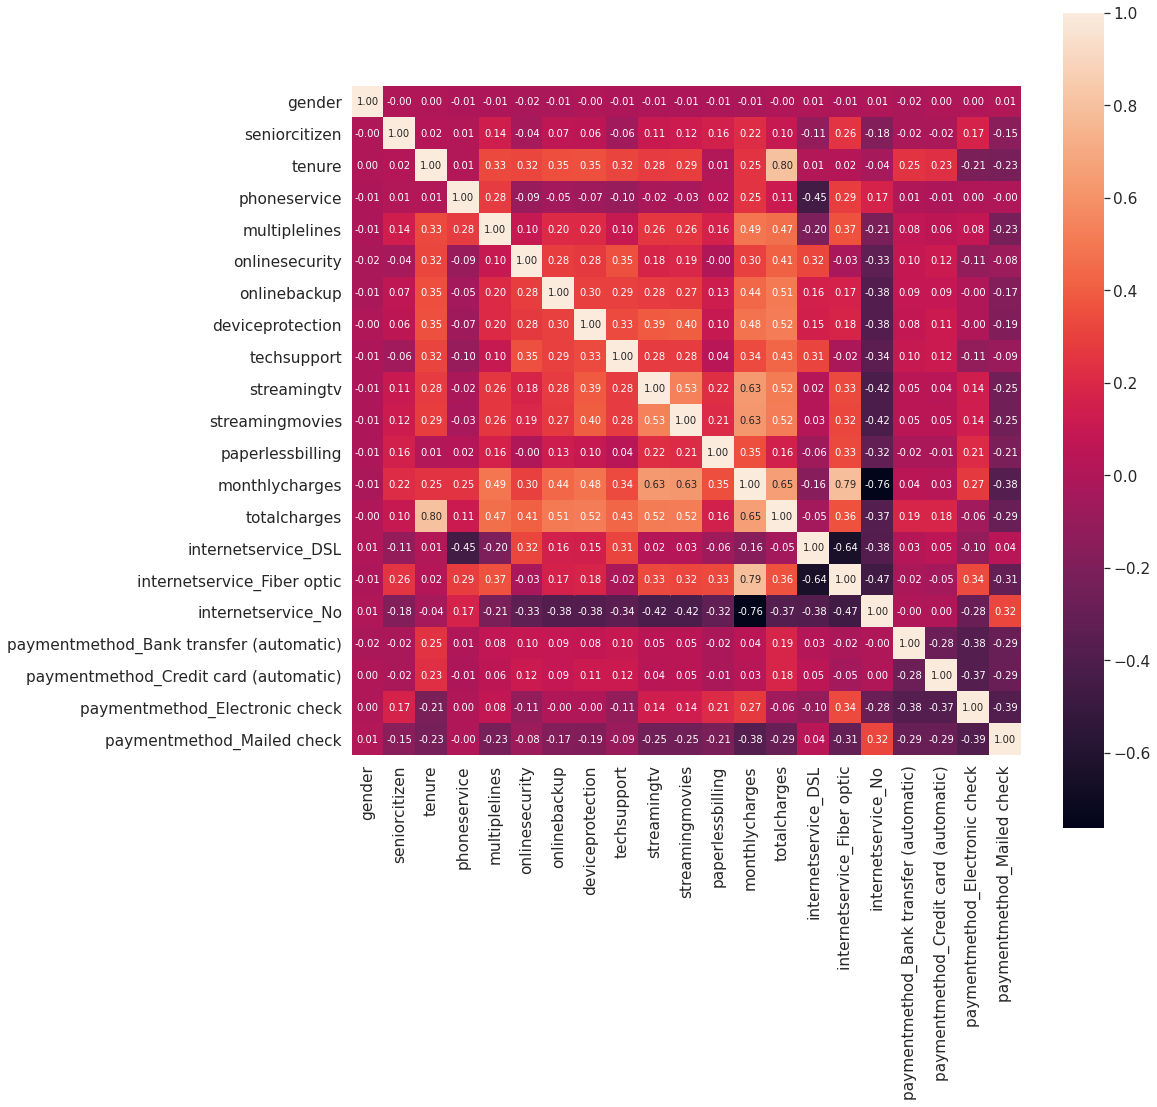

In [44]:
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

cols = ['gender','seniorcitizen','tenure','phoneservice','multiplelines','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','paperlessbilling','monthlycharges','totalcharges','internetservice_DSL','internetservice_Fiber optic','internetservice_No','paymentmethod_Bank transfer (automatic)','paymentmethod_Credit card (automatic)','paymentmethod_Electronic check','paymentmethod_Mailed check']
cm = np.corrcoef(data2[cols].values.T)
sns.set(font_scale = 1.4)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':10}, yticklabels = cols, xticklabels = cols)